# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [8]:
# Importe as bibliotecas
import pandas as pd

In [9]:
# leia os conjuntos de dados em DataFrames
instacart_orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products_df = pd.read_csv('/datasets/products.csv', sep=';')
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/instacart_orders.csv'

In [ ]:
# imprima as informações sobre o DataFrame
print(instacart_orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [ ]:
# imprima as informações sobre o DataFrame
print(order_products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [ ]:
# imprima as informações sobre o DataFrame
print(aisles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [ ]:
# imprima as informações sobre o DataFrame
print(departments_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

Após as análises inciais dos dados, percebe-se que:
-Os df possuem valores ausentes ou duplicados, o que pode impactar as analises futuras.
-Existem valores duplicados que também podem impactar as analises.
-As colunas dos df possuem tipo de dados variados, incluindo strigns e object.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

Plano de ação:
-Verificar e corrigir o tipo de dados (as colunas sejam do tipo int)
-Converter a formato de data e hora para o formato apropriado
-Identificar e tratar os valores ausentes
-Identificar a presença de valores duplicados e remove-los

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [ ]:
# Verificar se há pedidos duplicados

duplicates_orders = instacart_orders_df[instacart_orders_df.duplicated()]
print(duplicates_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Há linhas duplicadas? Se sim, o que elas têm em comum?
Sim, temos linhas duplicadas como pode ser visto acima.

In [ ]:
# Com base nas suas conclusões,verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

early_morning_orders = instacart_orders_df[(instacart_orders_df['order_hour_of_day'] == 2) & (instacart_orders_df['order_dow'] == 3)]
print(early_morning_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

O que esse resultado quer dizer?

Quer dizer que temos 121 pedidos feitos as 2h da manhã e as quartas feiras, porém tem valores duplicados.

In [ ]:
# Remova pedidos duplicados

early_morning_orders = early_morning_orders.drop_duplicates()


In [ ]:
# Verifique as linhas duplicadas mais uma vez

print(early_morning_orders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [ ]:
# Verifique novamente apenas os IDs de pedidos duplicados

duplicated_order_ids = early_morning_orders[early_morning_orders.duplicated(subset=['order_id'])]

print(duplicated_order_ids)


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []




Descreva brevemente suas conclusões e o que você fez com elas.

os valores duplicados foram eliminados.

### DataFrame `products`

In [ ]:
# Verifique se há linhas completamente duplicadas
duplicated_rows = products_df[products_df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [ ]:
# Verifique apenas IDs dos produtos duplicados

duplicated_product_ids = products_df[products_df.duplicated(subset=['product_id'])]
print(duplicated_product_ids)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [ ]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
duplicated_product_names = products_df[products_df.duplicated(subset=['product_name'], keep=False)]
duplicated_product_names['product_name'] = duplicated_product_names['product_name'].str.lower()
print(duplicated_product_names)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


/tmp/ipykernel_32/930203206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_product_names['product_name'] = duplicated_product_names['product_name'].str.lower()


In [ ]:
# Verifique os nomes de produtos duplicados que não estão faltando

duplicated_missing_names = duplicated_product_names[duplicated_product_names['product_name'].notna()]
print(duplicated_missing_names)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.

não temos valores duplicados após tratar os dados

### DataFrame `departments`

In [ ]:
# Verifique se há linhas completamente duplicadas

duplicated_rows_departments = departments_df[departments_df.duplicated()]
print(duplicated_rows_departments)

Empty DataFrame
Columns: [department_id, department]
Index: []


In [ ]:
# Verifique apenas se há IDs dos produtos duplicados
duplicated_product_ids_departments = departments_df[departments_df.duplicated(subset=['department_id'])]
print(duplicated_product_ids_departments)

Empty DataFrame
Columns: [department_id, department]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.
não ha linhas duplicadas.

### DataFrame `aisles`

In [ ]:
# Verifique se há linhas completamente duplicadas

duplicated_rows_aisles = aisles_df[aisles_df.duplicated()]
print(duplicated_rows_aisles)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [ ]:
# Verifique apenas se há IDs dos produtos duplicados
duplicated_ids_aisles = aisles_df[aisles_df.duplicated(subset=['aisle_id'])]
print(duplicated_ids_aisles)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `order_products`

In [ ]:
# Verifique se há linhas completamente duplicadas
duplicated_rows_order_products_df = order_products_df[order_products_df.duplicated()]
print(duplicated_rows_order_products_df)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [ ]:
# Verifique mais uma vez se há outros casos complicados de duplicados
duplicated_ids_order_products_df = order_products_df[order_products_df.duplicated(subset=['order_id'])]
print(duplicated_ids_order_products_df)

         order_id  product_id  add_to_cart_order  reordered
367       2867619       48094                9.0          0
824        844425       39408               10.0          1
1124      3319857       37067               19.0          0
1258      1038788       12471               14.0          0
1303      2825714       44632               16.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4094961 rows x 4 columns]


Descreva brevemente suas conclusões e o que você fez com elas.

Não há linhas completamente duplicadas, porém temos linhas com valores duplicados de order_id.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [ ]:
# Encontre valores ausentes na coluna 'product_name'
missing_product_names = products_df[products_df['product_name'].isna()]
print(missing_product_names)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões.
1258 valores NaN

In [ ]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
aisle_100_missing = missing_product_names[missing_product_names['aisle_id'] == 100]
print(aisle_100_missing)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões.
Todos os os nomes ausentes estão associados ao aisle_id 1000 pois em ambos os casos temos 1258 rows.

In [ ]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
department_21_missing = missing_product_names[missing_product_names['department_id'] == 21]
print(department_21_missing)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões.
Como temos 1258 rows, podemos afirmar que sim.

In [ ]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
aisle_100_info = aisles_df[aisles_df['aisle_id'] == 100]
department_21_info = departments_df[departments_df['department_id'] == 21]

print(aisle_100_info)
print(department_21_info)

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Descreva brevemente suas conclusões.

In [ ]:
# Preencha nomes de produtos ausentes com 'Unknown'
products_df['product_name'].fillna('Unknown', inplace=True)
print(products_df[products_df['product_name'] == 'Unknown'])

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões e o que você fez com elas.
os valores ausentes foram preenchidos evitando assim erros ao processar os dados.

### DataFrame `orders`

In [ ]:
# Encontre os valores ausentes
missing_days_since_order = instacart_orders_df[instacart_orders_df['days_since_prior_order'].isna()]
print(missing_days_since_order)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [ ]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
first_order_missing = missing_days_since_order[missing_days_since_order['order_number'] == 1]
print(first_order_missing)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Descreva brevemente suas conclusões e o que você fez com elas.

Todos os valores ausentes correspondem ao primeiro pedido.

### DataFrame `order_products`

In [ ]:
# Encontre os valores ausentes
missing_add_to_cart_order = order_products_df[order_products_df['add_to_cart_order'].isna()]
print(missing_add_to_cart_order.shape[0])


836


In [ ]:
# Quais são os valores mínimo e máximo dessa coluna?
min_value = order_products_df['add_to_cart_order'].min()
max_value = order_products_df['add_to_cart_order'].max()
print("Valor mínimo em 'add_to_cart_order':", min_value)
print("Valor máximo em 'add_to_cart_order':", max_value)

Valor mínimo em 'add_to_cart_order': 1.0
Valor máximo em 'add_to_cart_order': 64.0


Descreva brevemente suas conclusões.

In [ ]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
orders_with_missing_add_to_cart_order = missing_add_to_cart_order['order_id'].unique()

In [ ]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem

orders_with_large_product_counts = order_products_df[order_products_df['order_id'].isin(orders_with_missing_add_to_cart_order)]
grouped_orders = orders_with_large_product_counts.groupby('order_id')['product_id'].count()
print("Contagem mínima de 'product_id' em pedidos com valores ausentes em 'add_to_cart_order':", grouped_orders.min())


Contagem mínima de 'product_id' em pedidos com valores ausentes em 'add_to_cart_order': 65


Descreva brevemente suas conclusões.
Todos os pedidos contêm mais de 64 produtos.

In [ ]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

order_products_df['add_to_cart_order'].fillna(999, inplace=True)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)

print(order_products_df[order_products_df['add_to_cart_order'] == 999])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                999          0
9926      1968313       43867                999          0
14394     2926893       11688                999          0
16418     1717990        4142                999          0
30114     1959075       42828                999          1
...           ...         ...                ...        ...
4505662   1800005        7411                999          0
4511400   1633337         260                999          0
4517562    404157        9517                999          0
4534112   1673227       17835                999          0
4535739   1832957       17949                999          1

[836 rows x 4 columns]


# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [ ]:
valid_hours = instacart_orders_df['order_hour_of_day'].between(0, 23).all()
print("Valores válidos em 'order_hour_of_day':", valid_hours)

Valores válidos em 'order_hour_of_day': True


In [ ]:
valid_days = instacart_orders_df['order_dow'].between(0, 6).all()
print("Valores válidos em 'order_dow':", valid_days)

Valores válidos em 'order_dow': True


Escreva suas conclusões aqui
Como o resultado foi True, os valores fazem sentido.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

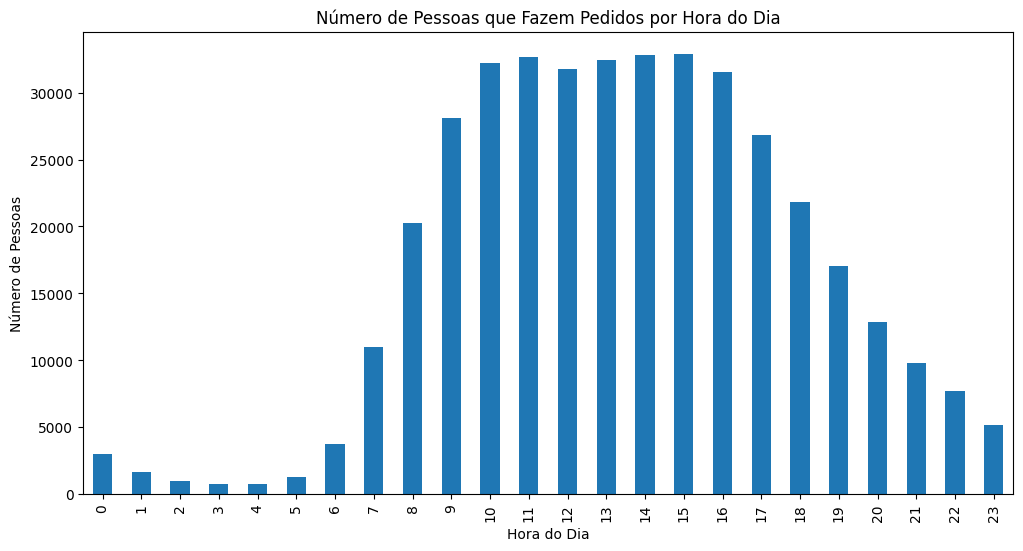

In [ ]:
import matplotlib.pyplot as plt

# Contagem de pedidos por hora do dia
orders_by_hour = instacart_orders_df.groupby('order_hour_of_day')['user_id'].nunique()

# Gráfico 
plt.figure(figsize=(12, 6))
orders_by_hour.plot(kind='bar')
plt.title('Número de Pessoas que Fazem Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pessoas')
plt.show()

Escreva suas conclusões aqui
Através do gráfico em barras, podemos ver quantos pedidos são feitos por hora.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

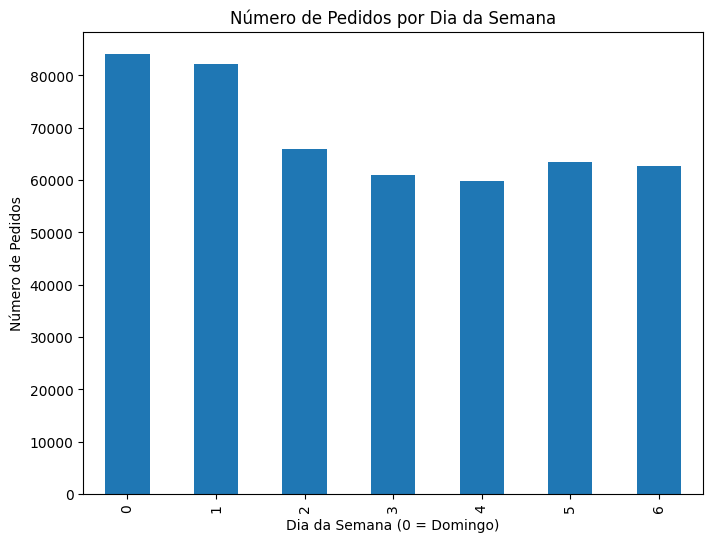

In [ ]:
# Contagem de pedidos por dia da semana
orders_per_day = instacart_orders_df['order_dow'].value_counts().sort_index()

# Gráfico 
plt.figure(figsize=(8, 6))
orders_per_day.plot(kind='bar')
plt.title('Número de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana (0 = Domingo)')
plt.ylabel('Número de Pedidos')
plt.show()

Conclusão:

Domingo é o dia com maior número de pedidos

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Através do gráfico podemos ver a distribuição entre o número de pedidos e o intervalo.
Sendo o tempo minimo 0 e o tempo maximo 30.

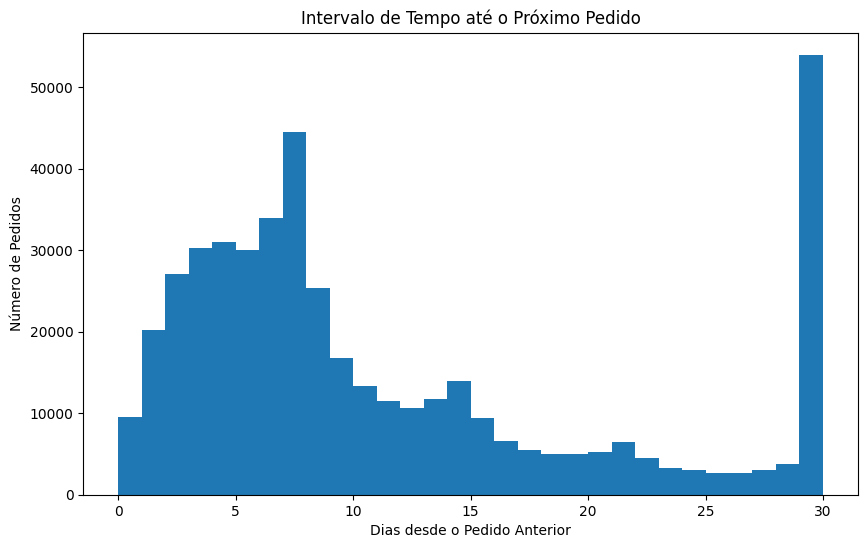

In [ ]:
plt.figure(figsize=(10, 6))
instacart_orders_df['days_since_prior_order'].dropna().plot(kind='hist', bins=30)
plt.title('Intervalo de Tempo até o Próximo Pedido')
plt.xlabel('Dias desde o Pedido Anterior')
plt.ylabel('Número de Pedidos')
plt.show()


# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

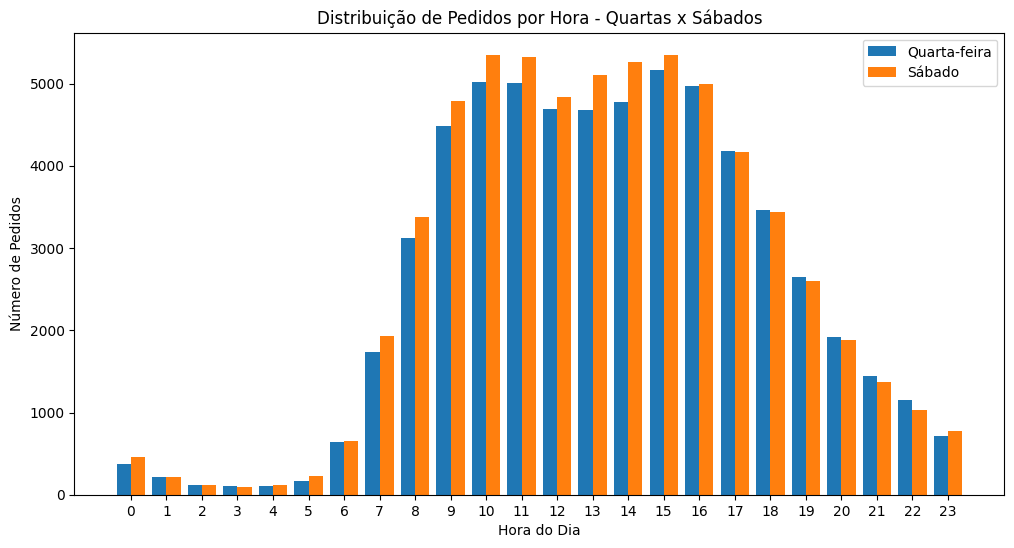

In [ ]:
# Filtrando os pedidos feitos nas quartas-feiras e sábados
wednesday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 3]
saturday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 5]

# Contando os pedidos por hora para quartas e sábados
wednesday_order_hours = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_order_hours = saturday_orders['order_hour_of_day'].value_counts().sort_index()

# Gráfico de barras sobreposto 
plt.figure(figsize=(12, 6))
plt.bar(wednesday_order_hours.index - 0.2, wednesday_order_hours.values, width=0.4, label='Quarta-feira')
plt.bar(saturday_order_hours.index + 0.2, saturday_order_hours.values, width=0.4, label='Sábado')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.title('Distribuição de Pedidos por Hora - Quartas x Sábados')
plt.legend()
plt.xticks(range(24))
plt.show()

Conclusões:
Nota-se observando os gráficos que:
Pedidos feitos nas quartas tem horario de pico de manhã e final da tarde.
Pedidos feitos nos sábados, tem horario de pico mais tarde
Essa análise ajuda a identificar quando a demanda é mais intensa em dias úteis versus finais de semana.

### [B2] Qual é a distribuição do número de pedidos por cliente?

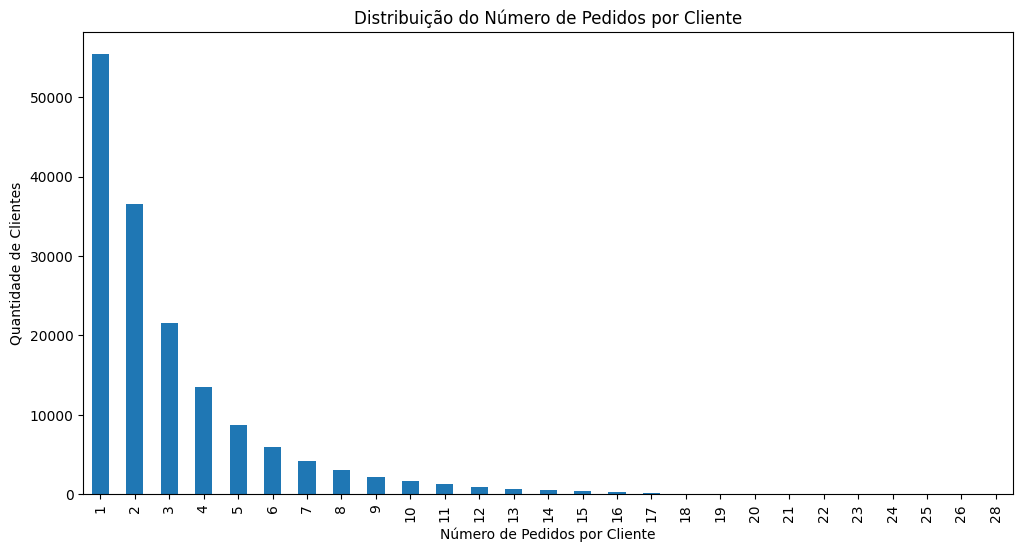

In [ ]:
# Contando o número de pedidos por cliente
orders_per_customer = instacart_orders_df['user_id'].value_counts()

# Gráfico de distribuição do número de pedidos por cliente
plt.figure(figsize=(12, 6))
orders_per_customer.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Número de Pedidos por Cliente')
plt.ylabel('Quantidade de Clientes')
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.show()

Conclusões:

A maioria dos clientes fazem de 1 a 2 pedidos.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [ ]:
# Combinando as tabelas order_products e products para obter os nomes dos produtos
top_products = order_products_df.merge(products_df, on='product_id', how='left')

# Contando os top 20 produtos mais comprados e ordenando
top_20_products = top_products['product_name'].value_counts().head(20)

# Localizando as IDs e nomes dos 20 produtos mais comprados 
top_20_products_df = (
    top_products[top_products['product_name'].isin(top_20_products.index)]
    .groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).head(20).reset_index()
)

# Exibindo o resultado
print('ordem do top_20_product_ids:',top_20_products_df)
print('\n')
print('ordem do top_20_products:',top_20_products.index)

ordem do top_20_product_ids:     product_id              product_name  order_id
0        24852                    Banana     66050
1        13176    Bag of Organic Bananas     53297
2        21137      Organic Strawberries     37039
3        21903      Organic Baby Spinach     33971
4        47209      Organic Hass Avocado     29773
5        47766           Organic Avocado     24689
6        47626               Large Lemon     21495
7        16797              Strawberries     20018
8        26209                     Limes     19690
9        27845        Organic Whole Milk     19600
10       27966       Organic Raspberries     19197
11       22935      Organic Yellow Onion     15898
12       24964            Organic Garlic     15292
13       45007          Organic Zucchini     14584
14       39275       Organic Blueberries     13879
15       49683            Cucumber Kirby     13675
16       28204        Organic Fuji Apple     12544
17        5876             Organic Lemon     12232
18

Conclusões:

Saber os principais produtos comprados pelos clientes é um dado muito relevante para gerenciar o estoque, fazer promoções e etc.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [ ]:
#para responder essa questão, primeiro precisa-se calcular o número de itens que as pessoas normalmente compram em cada pedido e visualizar a distribuição desses valores para entender o comportamento de compra dos clientes.

In [ ]:
items_per_order = order_products_df['order_id'].value_counts()

plt.figure(figsize=(12, 6))
items_per_order.plot(kind='hist', bins=30)
plt.xlabel('Quantidade de Itens por Pedido')
plt.ylabel('Frequência')
plt.title('Distribuição da Quantidade de Itens por Pedido')
plt.show()

Conclusões:

A maioria dos pedidos feitos, contém poucos itens.

# Conclusão geral do projeto:

In [ ]:
Ao manipular os dados, temos condições de realizar analises mais precisas.
Com as ferramentas de AED, conseguimos ter visões que apenas os dados brutos não dariam e isso ajuda na tomada de decisões para qualquer negocio.